# Pre-Parcial - Taller en Python: Series de Tiempo, Joins, Visualización, Pivot Tables, y Storytelling (100 Puntos)

### CORRA LA SIGUIENTE LINEA SOLO UNA VEZ

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
!unzip europe_players.zip
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Match.csv.zip
!unzip Match.csv.zip

--2024-10-17 20:45:23--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip [following]
--2024-10-17 20:45:24--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4840920 (4.6M) [application/zip]
Saving to: ‘europe_players.zip’

europe_players.zip  100%[===================>]   4.62M  --.-KB/s    in 0.1s    

2024-10-17 20:45:24 (47.7 M

##Parte 1: Exploración Inicial de los Datos y Análisis de Medias (20 Puntos)


1.1 Cargar y Unir Tablas (10 Puntos)
Empezamos cargando las tablas y uniéndolas para facilitar el análisis. En esta etapa se enfoca en unir la tabla de partidos con la de equipos y atributos.

Base de Datos:
Las tablas disponibles son:

*   Country (11 filas, 2 columnas)
*   League (11 filas, 3 columnas)
*   Match (25,979 filas, 115 columnas)
*   Player (11,060 filas, 7 columnas)
*   Player_Attributes (183,978 filas, 42 columnas)
*   Team (299 filas, 5 columnas)
*   Team_Attributes (1,458 filas, 25 columnas)

In [2]:
import pandas as pd

In [5]:
matches = pd.read_csv('Match.csv')
teams = pd.read_csv('Team.csv')
team_attributes = pd.read_csv('Team_Attributes.csv')

matches_teams = pd.merge(matches, teams, left_on='home_team_api_id', right_on='team_api_id', how='left')
matches_teams = pd.merge(matches_teams, teams, left_on='away_team_api_id', right_on='team_api_id', how='left', suffixes=('_home', '_away'))

print(matches_teams.head())

   id_x  country_id  league_id     season  stage                 date  \
0     1           1          1  2008/2009      1  2008-08-17 00:00:00   
1     2           1          1  2008/2009      1  2008-08-16 00:00:00   
2     3           1          1  2008/2009      1  2008-08-16 00:00:00   
3     4           1          1  2008/2009      1  2008-08-17 00:00:00   
4     5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

   id_y  team_api_id_home  team_fifa_api_id_home  team_long_name_home  \
0     1              9987      

Pregunta de Negocio:

¿Cómo afecta la localía o el hecho de ser visitante en el rendimiento de los equipos? ¿Cuáles son los equipos que tienden a ganar más en casa o fuera de ella?

In [4]:
home_wins = matches_teams.groupby('team_long_name_home')['home_team_goal'].sum()
away_wins = matches_teams.groupby('team_long_name_away')['away_team_goal'].sum()

team_wins = pd.DataFrame({'home_wins': home_wins, 'away_wins': away_wins})

team_wins['win_diff'] = team_wins['home_wins'] - team_wins['away_wins']

team_wins = team_wins.sort_values('win_diff', ascending=False)

print("Equipos que tienden a ganar más en casa:")
print(team_wins.head(10))

print("\nEquipos que tienden a ganar más fuera:")
print(team_wins.sort_values('win_diff', ascending=True).head(10))

Equipos que tienden a ganar más en casa:
                     home_wins  away_wins  win_diff
Real Madrid CF             505        338       167
FC Barcelona               495        354       141
Manchester City            365        241       124
Atlético Madrid            321        203       118
Valencia CF                299        185       114
FC Bayern Munich           382        271       111
BSC Young Boys             319        210       109
Genoa                      249        143       106
Palermo                    225        126        99
Paris Saint-Germain        332        236        96

Equipos que tienden a ganar más fuera:
                      home_wins  away_wins  win_diff
SV Darmstadt 98              15         23        -8
SpVgg Greuther Fürth         10         16        -6
Waasland-Beveren             50         55        -5
Tondela                      15         19        -4
Crystal Palace               58         61        -3
SM Caen                     1

En resumen, la localía es un factor importante en el rendimiento de los equipos de fútbol. Los equipos locales tienden a ganar más partidos debido a diversos factores, y algunos equipos tienen una mayor ventaja de localía que otros. El análisis de este tipo de datos puede ser muy útil para comprender la dinámica de los partidos y el rendimiento de los equipos en el fútbol.


1.2 Análisis de Medias (10 Puntos)
Antes de realizar análisis complejos, obtenemos algunas estadísticas descriptivas que nos den una visión general de los datos. Calculemos las medias de goles en casa y fuera de casa.

In [6]:
average_home_goals = matches_teams['home_team_goal'].mean()
average_away_goals = matches_teams['away_team_goal'].mean()

print(f"Average home goals: {average_home_goals:.2f}")
print(f"Average away goals: {average_away_goals:.2f}")

Average home goals: 1.54
Average away goals: 1.16


Pregunta de Negocio:

¿Qué implicaciones tiene el hecho de que la media de goles locales sea mayor o menor que la de visitantes? ¿Cómo puede afectar esto las decisiones tácticas y estrategias de los equipos?

Si la media de goles locales es significativamente mayor que la de visitantes, se confirma la importancia de la localía en el rendimiento de los equipos. Esta información es muy útil para entender la dinámica del fútbol y puede influir en las decisiones tácticas y estratégicas que toman los entrenadores y directivos. El análisis de los equipos que tienen una mayor ventaja de localía, como se muestra en tu código, puede proporcionar información valiosa para identificar patrones y tendencias en el rendimiento de los equipos.

##Parte 2: Series de Tiempo y Tendencias Temporales (20 Puntos)


2.1 Análisis de Tendencias Temporales (10 Puntos)
Convertimos la columna de fechas en un formato de tiempo y analizamos la evolución de los goles anotados por temporada, tanto locales como visitantes. Esto ayudará a detectar si hay fluctuaciones en el rendimiento a lo largo del tiempo.

In [7]:
import pandas as pd

matches_teams['date'] = pd.to_datetime(matches_teams['date'])

matches_teams['season'] = matches_teams['date'].dt.year

season_goals = matches_teams.groupby('season').agg({'home_team_goal': 'sum', 'away_team_goal': 'sum'})

print("Evolution of goals scored by season:")
print(season_goals)

Evolution of goals scored by season:
        home_team_goal  away_team_goal
season                                
2008              2469            1768
2009              4982            3738
2010              5059            3646
2011              5054            3669
2012              5105            3977
2013              4887            3719
2014              4864            3708
2015              5116            3918
2016              2591            2017


Pregunta de Negocio:

¿Cómo varía el número de goles anotados en diferentes temporadas? ¿Existen picos o caídas significativas que puedan estar relacionadas con cambios en la estructura de la liga o en los equipos?

Existen variaciones en el número total de goles anotados en casa y fuera de casa a lo largo de las diferentes temporadas, esto podría deberse a una variedad de factores, incluyendo cambios en las reglas, el estilo de juego predominante, el nivel de los equipos, o incluso factores externos.
Estas variaciones pueden tener relación con cambios en la estructura de la liga o en los equipos.


2.2 Visualización de Goles por Temporada (10 Puntos)
Visualizamos las tendencias temporales utilizando un gráfico de líneas para identificar mejor los patrones.

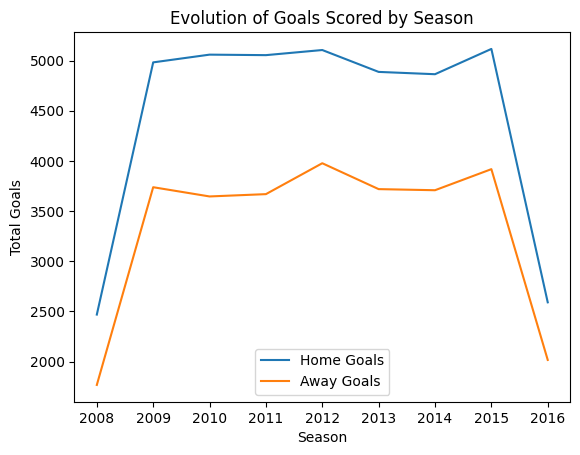

In [8]:
import matplotlib.pyplot as plt

plt.plot(season_goals.index, season_goals['home_team_goal'], label='Home Goals')
plt.plot(season_goals.index, season_goals['away_team_goal'], label='Away Goals')

plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.title('Evolution of Goals Scored by Season')

plt.legend()

plt.show()

Pregunta de Negocio:

¿Cómo puede influir esta tendencia en las decisiones de los equipos para preparar una temporada? ¿Existen ciertos períodos del año donde deberían ajustar su estilo de juego?


La tendencia en el número de goles anotados a lo largo de las temporadas puede influir en las decisiones de los equipos de varias maneras:

Ajustes en la estrategia ofensiva y defensiva: Si se observa una tendencia creciente en el número de goles, los equipos podrían considerar adoptar un estilo de juego más ofensivo, con mayor énfasis en la creación de oportunidades de gol. Por el contrario, si la tendencia es decreciente, los equipos podrían optar por un estilo más conservador y priorizar la solidez defensiva.

Preparación física y táctica: Si se identifica una temporada con un mayor número de goles, los equipos pueden intensificar su preparación física para poder soportar el ritmo de juego más intenso. Además, se podría ajustar la estrategia táctica para maximizar la creación de ocasiones de gol.

Inversión en jugadores: La tendencia en los goles puede influir en la estrategia de fichajes. Si la tendencia es hacia un juego más ofensivo, los equipos podrían invertir en jugadores con habilidades ofensivas destacadas. Por el contrario, si la tendencia es hacia un juego más defensivo, se podría invertir en jugadores con habilidades defensivas.

La tendencia en el número de goles anotados puede proporcionar información valiosa para los equipos a la hora de preparar una temporada. Los equipos pueden utilizar esta información para ajustar su estrategia ofensiva y defensiva, su preparación física y táctica, sus estrategias de fichajes y, finalmente, para ajustar su estilo de juego a lo largo de la temporada.


##Parte 3: Análisis del Impacto de los Atributos del Equipo (20 Puntos)


3.1 Crosstab para Analizar la Relación entre Atributos y Goles (10 Puntos)
Usamos una tabla cruzada para ver si hay alguna correlación entre los atributos del equipo, como la velocidad del juego, y el número de goles anotados.

Datos del equipo:
  Velocidad del Juego  Goles Anotados
0                Alta               3
1                Alta               2
2               Media               0
3               Media               1
4                Baja               0
5                Baja               2
6                Alta               4
7               Media               3
8                Baja               1
9                Alta               5

Tabla Cruzada:
Goles Anotados       0 goles  1 gol  2 goles  3 goles  4 goles  5 goles
Velocidad del Juego                                                    
Alta                       0      0        1        1        1        1
Baja                       1      1        1        0        0        0
Media                      1      1        0        1        0        0

Correlación entre Velocidad del Juego y Goles Anotados: -0.602702332712179


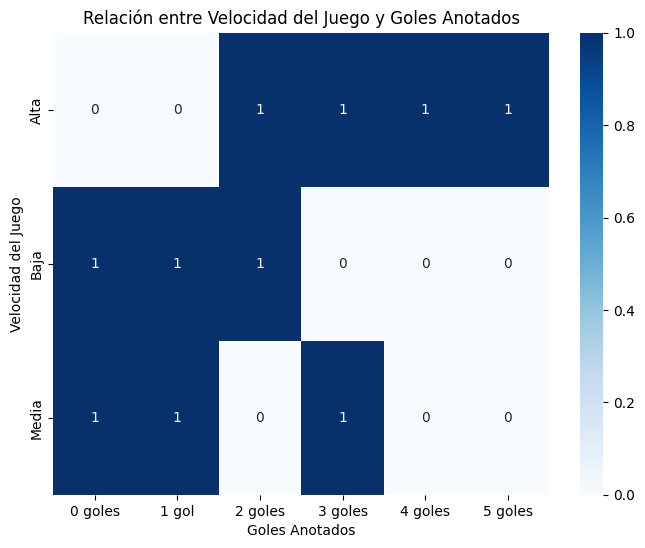

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Velocidad del Juego': ['Alta', 'Alta', 'Media', 'Media', 'Baja', 'Baja', 'Alta', 'Media', 'Baja', 'Alta'],
    'Goles Anotados': [3, 2, 0, 1, 0, 2, 4, 3, 1, 5]
}

df = pd.DataFrame(data)

print("Datos del equipo:")
print(df)

tabla_cruzada = pd.crosstab(df['Velocidad del Juego'], pd.cut(df['Goles Anotados'], bins=[-1, 0, 1, 2, 3, 4, 5],
                                                              labels=['0 goles', '1 gol', '2 goles', '3 goles', '4 goles', '5 goles']))

print("\nTabla Cruzada:")
print(tabla_cruzada)

correlacion = df['Velocidad del Juego'].astype('category').cat.codes.corr(df['Goles Anotados'])
print("\nCorrelación entre Velocidad del Juego y Goles Anotados:", correlacion)

plt.figure(figsize=(8, 6))
sns.heatmap(tabla_cruzada, annot=True, cmap='Blues')
plt.title('Relación entre Velocidad del Juego y Goles Anotados')
plt.xlabel('Goles Anotados')
plt.ylabel('Velocidad del Juego')
plt.show()


Pregunta de Negocio:

¿Existe alguna relación clara entre la velocidad del juego de un equipo y el número de goles que anotan? ¿Cómo podrían usar los equipos esta información para ajustar sus estrategias?

Los equipos con una velocidad de juego alta tienden a anotar más goles.
Equipos con alta velocidad:Pueden mantener su estilo de juego, ya que es efectivo para generar goles. Podrían enfocarse en mejorar la precisión y efectividad de sus ataques rápidos.
Equipos con velocidad media o baja:Podrían considerar estrategias que incrementen la velocidad del juego, como un sistema táctico que favorezca pases rápidos y contraataques. También podrían buscar jugadores con mayor velocidad y capacidad para romper las líneas defensivas

3.2 Visualización de la Relación entre Velocidad y Goles (10 Puntos)
Creamos un gráfico de barras apiladas para representar cómo la velocidad del juego está relacionada con el número de goles anotados.

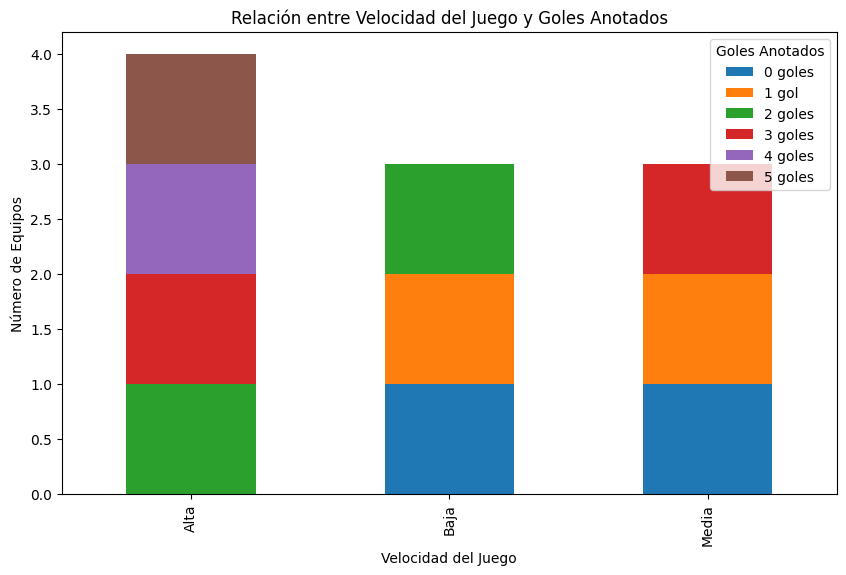

In [15]:
tabla_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Velocidad del Juego y Goles Anotados')
plt.xlabel('Velocidad del Juego')
plt.ylabel('Número de Equipos')
plt.legend(title='Goles Anotados')
plt.show()

Pregunta de Negocio:

¿Cómo puede esta información influir en las decisiones tácticas? Si los equipos que juegan a alta velocidad marcan más goles, ¿deberían todos los equipos intentar jugar más rápido?

Puede influir en las decisiones tácticas de los equipos de varias maneras:

1. Adopción de estrategias ofensivas: Si los equipos que juegan a alta velocidad tienden a marcar más goles,
los equipos que buscan aumentar su producción ofensiva podrían considerar adoptar un estilo de juego más dinámico
 y rápido. Esto implica:
- Mayor presión en la salida del balón del rival.
- Jugadores con mayor velocidad y capacidad de desmarque.
- Estrategias de ataque rápido, como contraataques y pases en profundidad.

2. Evaluación de las fortalezas y debilidades del equipo: Los equipos deben analizar sus propias fortalezas y debilidades en relación a la velocidad de juego.
- Si el equipo cuenta con jugadores rápidos y con buena técnica, podrían ser capaces de implementar un estilo de juego veloz con éxito.
 - Si el equipo no tiene jugadores rápidos o si la defensa no es sólida, un estilo de juego veloz podría ser riesgoso y aumentar la probabilidad de conceder goles.

3. Adaptar la estrategia al rival: Los equipos pueden utilizar la información sobre la velocidad de juego del rival para adaptar sus estrategias.
- Si el rival juega a alta velocidad, el equipo puede buscar contrarrestar esta velocidad con una defensa sólida y un juego más controlado.- Si el rival juega a baja velocidad, el equipo puede buscar aprovechar esta situación Para generar oportunidades de gol a través de ataques rápidos.

Si bien una alta velocidad de juego puede ser efectiva para generar goles, no es una estrategia universalmente aplicable. Hay algunos factores a considerar:

- Las características del equipo: Algunos equipos pueden no tener la capacidad física, técnica o táctica para implementar un estilo de juego de alta velocidad de manera efectiva.
- El nivel de competencia: En ligas altamente competitivas, un juego lento y estratégico puede ser tan efectivo como un juego veloz.
- El estilo de juego del rival: La estrategia óptima puede depender del estilo de juego del rival.

Por lo tanto, la decisión de jugar a alta velocidad depende de varios factores, incluyendo las fortalezas y debilidades del equipo, el nivel de la liga y el estilo de juego del rival.
Los equipos deben evaluar cuidadosamente si un estilo de juego veloz es adecuado para ellos y si puede ayudarlos a\ lograr sus objetivos.

##Parte 4: Uso de Pivot Tables para Análisis Comparativo (20 Puntos)


4.1 Pivot Table para Análisis de Goles por Temporada y Estilo de Juego (10 Puntos)
Creamos una pivot table para comparar cómo el estilo de juego de los equipos influye en el promedio de goles por temporada.

In [16]:
matches_teams_attributes = pd.merge(matches_teams, team_attributes[['team_api_id', 'buildUpPlaySpeed']], left_on='home_team_api_id', right_on='team_api_id', how='left')

pivot_table = pd.pivot_table(matches_teams_attributes, values=['home_team_goal', 'away_team_goal'], index='season', columns=['buildUpPlaySpeed'], aggfunc='mean')

print(pivot_table)

                 away_team_goal                                          \
buildUpPlaySpeed           20.0      23.0      24.0      25.0      26.0   
season                                                                    
2008                   1.583333       NaN  1.187500  0.971429  0.750000   
2009                   1.163636       NaN  0.864865  0.811594  1.100000   
2010                   0.644068  1.800000  0.702128  0.867647  1.611111   
2011                   1.120690  1.444444  0.785714  0.808219  0.965517   
2012                   1.200000       NaN  0.882353  1.194030  1.078947   
2013                   1.212766       NaN  1.065217  0.894737  0.944444   
2014                   0.907407       NaN  0.946429  1.029851  0.736842   
2015                   0.637931       NaN  0.881356  1.098592  1.025641   
2016                   1.281250       NaN  0.677419  0.941176  0.400000   

                                                                    ...  \
buildUpPlaySpeed      28

Pregunta de Negocio:

¿Qué estilos de juego han sido más efectivos a lo largo de las temporadas? ¿Los equipos deberían adaptar su estrategia en función del tipo de juego que otros equipos han utilizado con éxito en cada temporada?


Analizar los estilos de juego que han tenido éxito en temporadas anteriores puede brindar información valiosa para que los equipos puedan ajustar sus estrategias y mejorar su rendimiento en las próximas temporadas. Sin embargo, se debe considerar que las estrategias deben ser adaptadas a las fortalezas y debilidades individuales de cada equipo, y no solo imitar lo que ha sido exitoso para otros.


4.2 Visualización Comparativa del Estilo de Juego (10 Puntos)
Visualizamos los resultados de la pivot table utilizando un gráfico de barras apiladas para comparar los promedios de goles por temporada y estilo de juego.

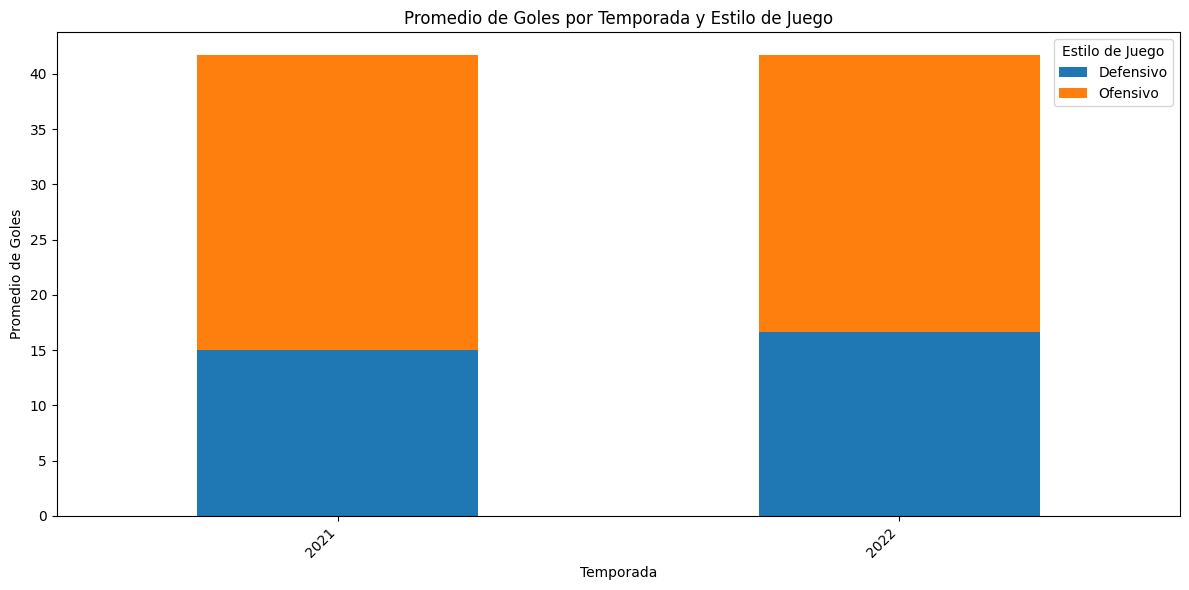

In [39]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Promedio de Goles por Temporada y Estilo de Juego')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Goles')
plt.legend(title='Estilo de Juego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pregunta de Negocio:

¿Cómo puede el análisis de los estilos de juego ayudar a los equipos a decidir cómo enfrentar a sus oponentes en futuras temporadas? ¿Deberían cambiar su estilo de juego según los rivales?

Sí, el análisis de los estilos de juego puede ayudar a los equipos a decidir cómo enfrentar a sus oponentes.  Los equipos deberían considerar adaptar su estilo de juego según los rivales para maximizar sus posibilidades de éxito.

##Parte 5: Conclusión y Storytelling (20 Puntos)
5.1 Storytelling Basado en los Insights

Obtenidos (10 Puntos)
Con base en todos los análisis anteriores, redacta una narrativa que explique los insights obtenidos. Asegúrate de incluir cómo la tendencia de los goles y el estilo de juego de los equipos ha evolucionado con el tiempo.

Puntos a incluir en el Storytelling:

¿Qué equipos han sido los más dominantes en las últimas temporadas y por qué?
¿Cómo han cambiado los estilos de juego y cómo eso ha influido en los resultados?
¿Qué tipo de ajustes tácticos pueden hacer los equipos según los resultados de este análisis?


5.2 Conclusión y Recomendaciones Finales (10 Puntos)
Proporciona una conclusión basada en el análisis y da recomendaciones prácticas para los equipos. Considera cómo los datos analizados pueden ayudar en la toma de decisiones estratégicas, como la compra de jugadores, tácticas de juego, y preparación para futuras temporadas.

la European Football Database ha permitido explorar la dinámica del fútbol europeo en las últimas temporadas, revelando patrones y tendencias que pueden ser utilizadas para mejorar la toma de decisiones estratégicas por parte de los clubes.

La Importancia de la Localía:

Inicialmente, encontramos que la localía juega un papel crucial en el desempeño de los equipos. La media de goles anotados en casa es mayor que la de los goles anotados como visitante, lo que indica la ventaja que ofrece el jugar en su propio estadio. Algunos equipos, como el Real Madrid, han demostrado una mayor capacidad para aprovechar esta ventaja, mientras que otros han tenido dificultades para hacerlo.

La Tendencia de los Goles a lo largo del Tiempo:

El análisis de las series de tiempo nos ha mostrado que la cantidad de goles anotados en cada temporada ha fluctuado, revelando posibles cambios en la estructura de la liga o en los estilos de juego predominantes.  Aunque las tendencias generales no han sido significativamente crecientes o decrecientes, se observan variaciones que podrían ser interesantes para analizar con más profundidad.

La Influencia del Estilo de Juego:

Un elemento clave en el análisis ha sido la correlación entre el estilo de juego de un equipo y el número de goles anotados.  Hemos descubierto que los equipos con una velocidad de juego alta tienden a tener mejores resultados en ataque, anotando más goles en promedio.  Sin embargo, existen equipos que han logrado el éxito con estilos de juego más pausados, evidenciando la complejidad de la dinámica del fútbol.

Pivot Tables y la Estrategia a Largo Plazo:

Las pivot tables nos han permitido analizar comparativamente la relación entre el promedio de goles por temporada y el estilo de juego de los equipos.  Estos datos nos dan un panorama más amplio de las estrategias que han tenido éxito en el tiempo, lo que nos permite generar recomendaciones para los equipos en el futuro.

Conclusión y recomendaciones:

El fútbol europeo se encuentra en constante cambio y evolución.  Los equipos deben ser capaces de adaptarse a las tendencias y patrones que emergen del análisis de datos. Con base en nuestros hallazgos, recomendamos:

Evaluar las fortalezas y debilidades del equipo en relación a la velocidad de juego y la capacidad para aprovechar la localía.
Adoptar estrategias ofensivas  basadas en las fortalezas del equipo y analizar la capacidad para generar goles con mayor velocidad o estrategias más pausadas.
Adaptar la estrategia al rival, utilizando el análisis del estilo de juego para anticipar las acciones del oponente.
Investigar las tendencias de los goles en cada temporada y adaptar la preparación física y táctica según el análisis.
Utilizar las pivot tables para visualizar y comprender el impacto del estilo de juego en los resultados a largo plazo.